## Observations and Insights 

1) There is a strong positive correlation between mouse weight and average tumor size

2) Ramicane and Capomulin drug regimens resulted in the lowest average tumor size

3) After reducing outliers, the drugs Capomulin and Ramicane both appear to be effective in reducing tumor volumes, even while the mouse weight is kept constant

Plots are in the Results Directory

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()
# Combine the data into a single dataset
master_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
master_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [89]:
# Checking the number of mice.
master_data['Mouse ID'].nunique()

249

In [90]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = master_data[master_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [91]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = master_data[master_data.duplicated()]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [92]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
master_data = master_data[master_data['Mouse ID'] != 'g989']

In [93]:
# Checking the number of mice in the clean DataFrame.
master_data['Mouse ID'].nunique()

248

## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
reg_grouped = master_data.groupby("Drug Regimen")
reg_grouped.head()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol = reg_grouped['Tumor Volume (mm3)'].mean()
median_tumor_vol = reg_grouped['Tumor Volume (mm3)'].median()
variance_tumor = reg_grouped['Tumor Volume (mm3)'].var()
std_dev_tumor = reg_grouped['Tumor Volume (mm3)'].std()
sem_tumor = reg_grouped['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
reg_summary_stats = pd.DataFrame(({'Mean Tumor Volume (mm3)': mean_tumor_vol,
                                  'Median Tumor Volume (mm3)': median_tumor_vol,
                                  'Tumor Volume Variance': variance_tumor,
                                  'Tumor Volume Std Dev': std_dev_tumor,
                                  'Tumor Volume SEM': sem_tumor}))
reg_summary_stats


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
reg_grouped['Tumor Volume (mm3)'].agg({'mean', 'median', 'var', 'std', 'sem'})

,mean,std,sem,median,var
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,0.329346,41.557809,24.947764
Ceftamin,52.591172,6.268188,0.469821,51.776157,39.290177
Infubinol,52.884795,6.567243,0.492236,51.820584,43.128684
Ketapril,55.235638,8.279709,0.603860,53.698743,68.553577
Naftisol,54.331565,8.134708,0.596466,52.509285,66.173479
Placebo,54.033581,7.821003,0.581331,52.288934,61.168083
Propriva,52.320930,6.622085,0.544332,50.446266,43.852013
Ramicane,40.216745,4.846308,0.320955,40.673236,23.486704
Stelasyn,54.233149,7.710419,0.573111,52.431737,59.450562


## Bar and Pie Charts

Text(0.5, 1.0, 'Timepoints Per Drug')

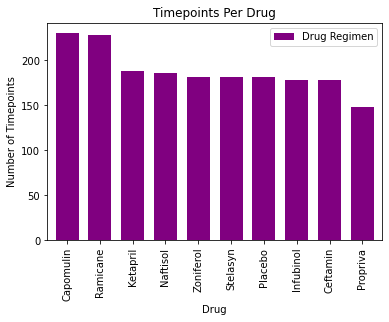

In [96]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

pandas_bar = master_data['Drug Regimen'].value_counts().plot.bar(color='purple', width=0.7, zorder=3)
pandas_bar.legend(loc=1)
pandas_bar.set_xlabel("Drug")
pandas_bar.set_ylabel("Number of Timepoints")
pandas_bar.set_title("Timepoints Per Drug")

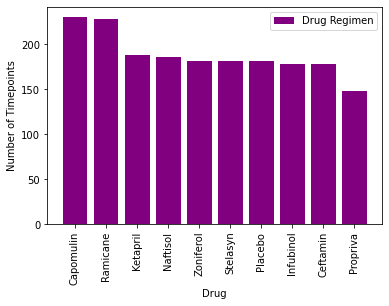

In [106]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = master_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color='purple', alpha=1, label='Drug Regimen')
plt.legend(loc="upper right")
plt.xlabel("Drug")
plt.ylabel("Number of Timepoints")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values, rotation=90)
plt.savefig('Results/drug_regimen.png', bbox_inches = "tight")
plt.show()


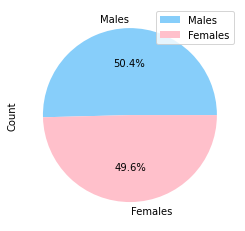

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_sex_data = master_data.loc[master_data["Sex"] == "Female"]
female_count = female_sex_data["Mouse ID"].nunique()
male_sex_data = master_data.loc[master_data["Sex"] == 'Male']
male_count = male_sex_data['Mouse ID'].nunique()
sex_data = [['Males', int(male_count)], ["Females", int(female_count)]]
sex_df = pd.DataFrame(sex_data, columns=['Sex', 'Count'])
sex_df = sex_df.set_index('Sex')
pie_labels = ['Males', 'Females']
pie_colors = ['lightskyblue', 'pink']
sex_df.plot(kind='pie', y='Count', autopct='%1.1f%%', colors=pie_colors, labels=pie_labels)



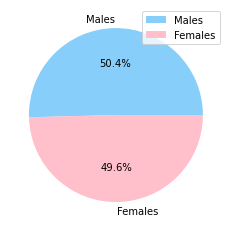

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_list = [male_count, female_count]
plt.pie(sex_list, labels=pie_labels, colors=pie_colors, autopct='%1.1f%%')
plt.legend(loc="upper right")
plt.savefig('Results/sex.png', bbox_inches = "tight")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = master_data.groupby(['Mouse ID']).agg(
    Timepoint=('Timepoint', 'max')).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_master_data = last_timepoint.merge(master_data, how='inner', on=['Mouse ID', 'Timepoint'])
last_timepoint_master_data.tail(50)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
198,v409,10,Placebo,Female,16,25,50.649038,1
199,v603,35,Ketapril,Female,22,30,63.189432,1
200,v719,20,Infubinol,Female,17,30,54.048608,1
201,v764,15,Stelasyn,Female,5,30,49.412624,2
202,v766,15,Infubinol,Male,16,27,51.542431,1
203,v835,20,Naftisol,Male,7,29,51.296543,2
204,v923,45,Capomulin,Female,19,21,40.658124,2
205,v989,10,Placebo,Male,4,25,52.614689,1
206,v991,45,Propriva,Female,10,30,70.167749,4
207,w140,5,Zoniferol,Female,19,30,47.717952,0


In [14]:
cap_df=last_timepoint_master_data[last_timepoint_master_data["Drug Regimen"].isin(["Capomulin"])].reset_index()
ram_df=last_timepoint_master_data[last_timepoint_master_data["Drug Regimen"].isin(["Ramicane"])].reset_index()
inf_df=last_timepoint_master_data[last_timepoint_master_data["Drug Regimen"].isin(["Infubinol"])].reset_index()
cef_df=last_timepoint_master_data[last_timepoint_master_data["Drug Regimen"].isin(["Ceftamin"])].reset_index()

# Put treatments into a list for for loop (and later for plot labels)
four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


box_dict = dict()
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in four_regimens:
    drug_df = last_timepoint_master_data.loc[last_timepoint_master_data['Drug Regimen'].isin([drug])].reset_index(drop=True)
    drug_volume = drug_df['Tumor Volume (mm3)'].tolist()
    box_dict[drug] = drug_volume
    
    
# Determine outliers using upper and lower bounds
    quartiles = drug_df.quantile([.25, .5, .75]).reset_index(drop=True)
    lowerq = quartiles.iloc[0]['Tumor Volume (mm3)']
    upperq = quartiles.iloc[2]['Tumor Volume (mm3)']
    medq = quartiles.iloc[1]['Tumor Volume (mm3)']
    iqr =upperq-lowerq
    print(f'Inter-Quartile Range for {drug}: {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Qartile Rage for {drug}: {lowerq}')
    print(f'Upper Quartile Range for {drug}: {upperq}')
    print(f'The IQR for {drug}: {iqr}')
    print(f'Median Range of Tumor Volume for {drug}: {medq}')
    print(f'Volumes to be used for plots for {drug}: {sorted(drug_volume)}')

Inter-Quartile Range for Capomulin: 7.781863460000004
Lower Qartile Rage for Capomulin: 32.37735684
Upper Quartile Range for Capomulin: 40.1592203
The IQR for Capomulin: 7.781863460000004
Median Range of Tumor Volume for Capomulin: 38.125164399999996
Volumes to be used for plots for Capomulin: [23.34359787, 28.43096411, 28.48403281, 30.48598484, 31.02392294, 31.896238399999998, 32.37735684, 33.32909778, 34.45529799, 36.04104736, 37.07402422, 37.31184577, 38.125164399999996, 38.75326548, 38.84687569, 38.93963263, 38.98287774, 39.95234669, 40.1592203, 40.65812366, 40.72857787, 41.48300765, 41.58152074, 46.53920617, 47.68596303]
Inter-Quartile Range for Ramicane: 9.098536719999998
Lower Qartile Rage for Ramicane: 31.56046955
Upper Quartile Range for Ramicane: 40.65900627
The IQR for Ramicane: 9.098536719999998
Median Range of Tumor Volume for Ramicane: 36.56165229
Volumes to be used for plots for Ramicane: [22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.09533505, 31.5

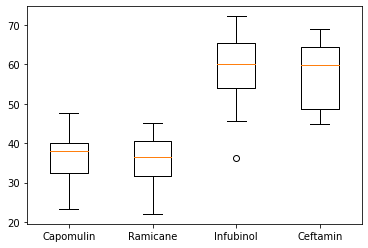

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())
plt.savefig('Results/box_plot.png', bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

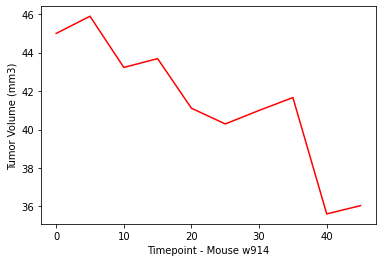

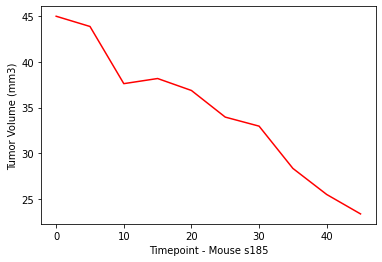

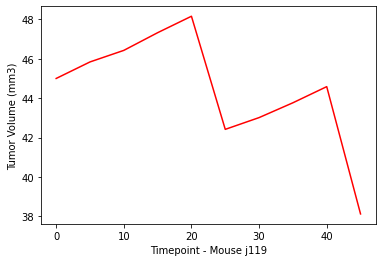

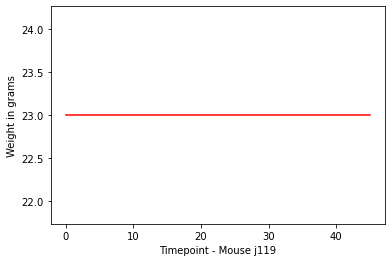

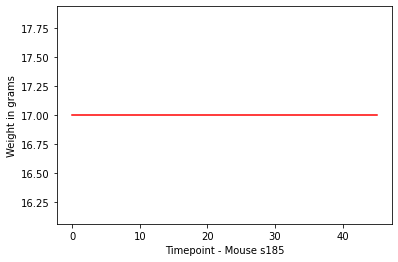

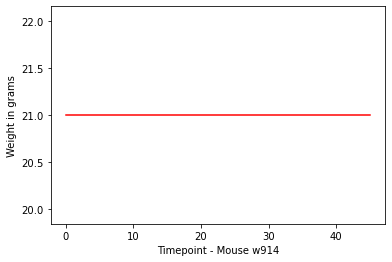

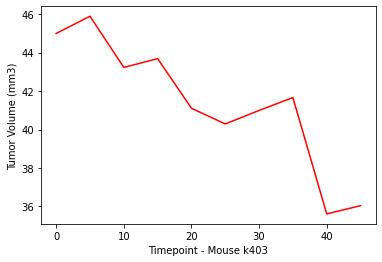

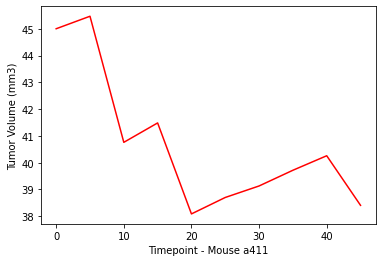

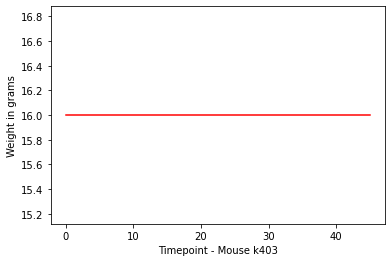

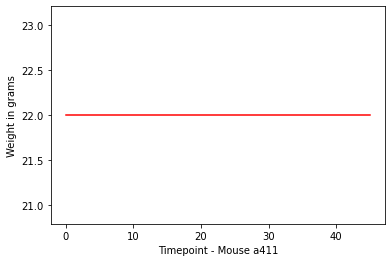

In [109]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capumolin_options = ['Capomulin']
capumolin_df = master_data.loc[(master_data['Tumor Volume (mm3)'] >= 32.0) &
                       (master_data['Tumor Volume (mm3)'] <= 40.0) & 
                       master_data['Drug Regimen'].isin(capumolin_options)]
#print(capumolin_df)

mouse_w914_df = master_data[master_data['Mouse ID']=='w914'].reset_index(drop=True)
mouse_w914_df
plt.plot(mouse_w914_df['Timepoint'], mouse_w914_df['Tumor Volume (mm3)'],linewidth=1.5, color ="red")
plt.xlabel("Timepoint - Mouse w914")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('Results/mouse_w914_result.png', bbox_inches = "tight")
plt.show()


mouse_s185 = master_data[master_data['Mouse ID']=='s185'].reset_index(drop=True)
plt.plot(mouse_s185['Timepoint'], mouse_s185['Tumor Volume (mm3)'],linewidth=1.5, color ="red")
plt.xlabel("Timepoint - Mouse s185")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('Results/mouse_s185_result.png', bbox_inches = "tight")
plt.show()

mouse_j119 = master_data[master_data['Mouse ID']=='j119'].reset_index(drop=True)
plt.plot(mouse_j119['Timepoint'], mouse_j119['Tumor Volume (mm3)'], linewidth=1.5, color = 'red')
plt.xlabel("Timepoint - Mouse j119")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('Results/mouse_j119_result.png', bbox_inches = "tight")
plt.show()

plt.plot(mouse_j119['Timepoint'], mouse_j119['Weight (g)'], linewidth=1.5, color = 'red')
plt.xlabel("Timepoint - Mouse j119")
plt.ylabel("Weight in grams")
plt.savefig('Results/mouse_j119_weight.png', bbox_inches = "tight")
plt.show()

plt.plot(mouse_s185['Timepoint'], mouse_s185['Weight (g)'], linewidth=1.5, color = 'red')
plt.xlabel("Timepoint - Mouse s185")
plt.ylabel("Weight in grams")
plt.savefig('Results/mouse_s185_weight.png', bbox_inches = "tight")
plt.show()

plt.plot(mouse_w914_df['Timepoint'], mouse_w914_df['Weight (g)'], linewidth=1.5, color = 'red')
plt.xlabel("Timepoint - Mouse w914")
plt.ylabel("Weight in grams")
plt.savefig('Results/mouse_w914_weight.png', bbox_inches = "tight")
plt.show()


# Generate a line plot of tumor volume vs. time point for a mouse treated with Ramicane
ramicane_options = ['Ramicane']
ramicane_df = master_data.loc[(master_data['Tumor Volume (mm3)'] >= 32.0) &
                       (master_data['Tumor Volume (mm3)'] <= 40.0) & 
                       master_data['Drug Regimen'].isin(ramicane_options)]
#print(ramicane_df)

mouse_k403_df = master_data[master_data['Mouse ID']=='k403'].reset_index(drop=True)
plt.plot(mouse_k403_df['Timepoint'], mouse_w914_df['Tumor Volume (mm3)'],linewidth=1.5, color ="red")
plt.xlabel("Timepoint - Mouse k403")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('Results/mouse_k403_results.png', bbox_inches = "tight")
plt.show()


mouse_a411 = master_data[master_data['Mouse ID']=='a411'].reset_index(drop=True)
plt.plot(mouse_a411['Timepoint'], mouse_a411['Tumor Volume (mm3)'],linewidth=1.5, color ="red")
plt.xlabel("Timepoint - Mouse a411")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('Results/mouse_a411_results.png', bbox_inches = "tight")
plt.show()

plt.plot(mouse_k403_df['Timepoint'], mouse_k403_df['Weight (g)'], linewidth=1.5, color = 'red')
plt.xlabel("Timepoint - Mouse k403")
plt.ylabel("Weight in grams")
plt.savefig('Results/mouse_k403_weight.png', bbox_inches = "tight")
plt.show()

plt.plot(mouse_a411['Timepoint'], mouse_a411['Weight (g)'], linewidth=1.5, color = 'red')
plt.xlabel("Timepoint - Mouse a411")
plt.ylabel("Weight in grams")
plt.savefig('Results/mouse_a411_weight.png', bbox_inches = "tight")
plt.show()

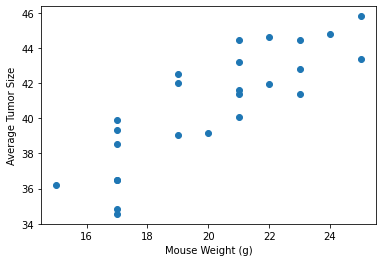

,Mouse ID,Weight (g),avg_tumor_size
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [115]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_drug_df=master_data[master_data["Drug Regimen"].isin(['Capomulin'])].reset_index(drop=True)
capomulin_df_avg=capomulin_drug_df.groupby(["Mouse ID", "Weight (g)"]).agg(
    avg_tumor_size = ('Tumor Volume (mm3)', 'mean')
).reset_index()


plt.scatter(capomulin_df_avg['Weight (g)'], capomulin_df_avg['avg_tumor_size'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Size")
plt.savefig('Results/avg_tumize_vs_mouse_weight.png', bbox_inches = "tight")
plt.show()
capomulin_df_avg

## Correlation and Regression

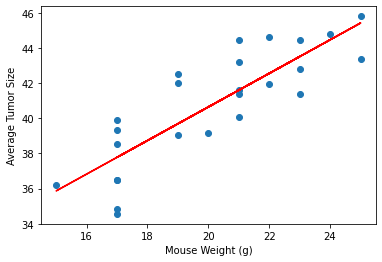

In [118]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_df_avg['Weight (g)'], capomulin_df_avg['avg_tumor_size'])
regress_values = (capomulin_df_avg['Weight (g)'] * slope + intercept)
plt.plot(capomulin_df_avg['Weight (g)'], regress_values, "r-")
plt.scatter(capomulin_df_avg['Weight (g)'], capomulin_df_avg['avg_tumor_size'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Size")
plt.savefig('Results/tumor_size_vs_weight_regression.png', bbox_inches = "tight")
plt.show()